In [254]:
# required imports

import pandas as pd
import seaborn as sns
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt

sns.set_style('whitegrid')

In [255]:
fp = r'../assets/map_data/india-polygon.shp'
map_df = gpd.read_file(fp)
df = pd.read_csv("../assets/data/cleaned_data.csv")
df_new = df[df["Year"] >= 2014]
df = df[df["Year"] < 2014]

In [256]:
state_mapping = {
    'Andaman_&_Nicobar_Islands' : "Andaman and Nicobar Islands", 
    'Andhra_Pradesh' : 'Andhra Pradesh', 
    'Arunachal_Pradesh' : 'Arunachal Pradesh' ,
    'Assam' : 'Assam',
    'Bihar' : 'Bihar', 
    'Chandigarh' : 'Chandigarh', 
    'Chhattisgarh' : 'Chhattisgarh',
    'Dadra_&_Nagar_Haveli' : 'Dadra and Nagar Haveli' ,
    'Daman_&_Diu' : 'Daman and Diu',
    'Delhi' :  'Delhi',
    'Goa' :'Goa', 
    'Gujarat' : 'Gujarat',
    'Haryana' : 'Haryana', 
    'Himachal_Pradesh' : 'Himachal Pradesh', 
    'Jammu_&_Kashmir' : 'Jammu and Kashmir', 
    'Jharkhand' : 'Jharkhand',
    'Karnataka' : 'Karnataka', 
    'Kerala' : 'Kerala',
    'Lakshadweep' : 'Lakshadweep', 
    'Madhya_Pradesh' : 'Madhya Pradesh',
    'Maharashtra' : 'Maharashtra', 
    'Manipur' : 'Manipur', 
    'Meghalaya' : 'Meghalaya', 
    'Mizoram' : 'Mizoram',
    'Nagaland' : 'Nagaland',
    'Odisha' : 'Odisha',
    'Puducherry' : 'Puducherry', 
    'Punjab' : 'Punjab', 
    'Rajasthan' : 'Rajasthan', 
    'Sikkim' : 'Sikkim',
    'Tamil_Nadu' : 'Tamil Nadu', 
    'Telangana' : 'Telangana', 
    'Tripura' : 'Tripura', 
    'Uttar_Pradesh' : 'Uttar Pradesh',
    'Uttarakhand':'Uttarakhand', 
    'West_Bengal' : 'West Bengal',
    'Dadra & Nagar Haveli And Daman & Diu' : 'Daman and Diu', 
    'Goa,_Daman_&_Diu' : 'Goa',
    'Mysore' : 'Karnataka' , 
    'Madras' : 'Tamil Nadu'
}
df['State'] = df['State_Name'].map(state_mapping)
df_new['State'] = df_new['State_Name'].map(state_mapping)

## Analysis 1: Change in Time with regard to gender ratio and caste ratio
- Here we make chorolopleth maps of india, to look at the ratio of gender distribution and caste distribution and check if it changed over time.

/var/folders/n0/ghrwq2494rq706swf_jqkwd80000gn/T/ipykernel_85602/902419602.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gender_ratio_df = gender_ratio_df.append(new_row, ignore_index=True)
/var/folders/n0/ghrwq2494rq706swf_jqkwd80000gn/T/ipykernel_85602/902419602.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gender_ratio_df_new = gender_ratio_df_new.append(new_row_new, ignore_index=True)


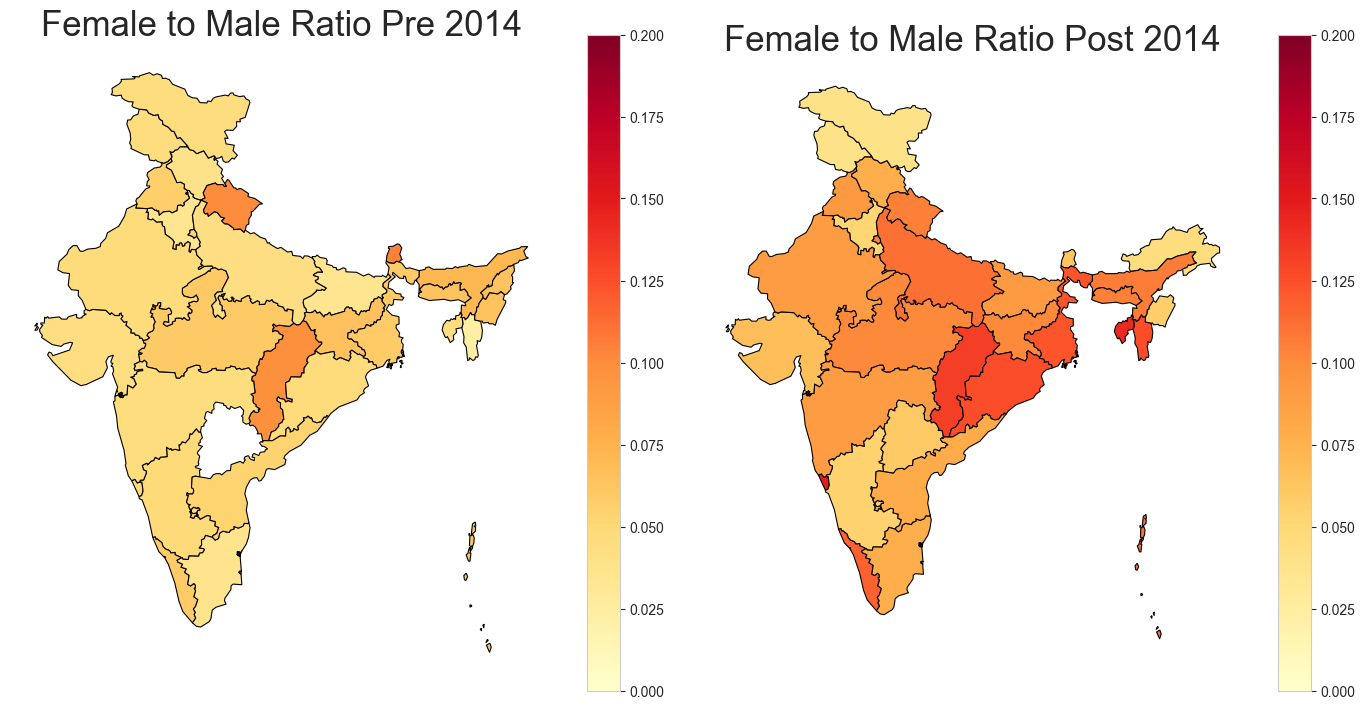

In [288]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have already defined 'map_df', 'df', and 'df_new'

# Function to create chloropleth map
def create_choropleth(ax, title, merged_df, vmin, vmax):
    ax.axis('off')
    ax.set_title(title, fontdict={'fontsize': '25', 'fontweight': '10'})
    merged_df.plot(column='Female_to_Male_Ratio', cmap='YlOrRd', linewidth=0.8, ax=ax, edgecolor='0', legend=True, vmin=vmin, vmax=vmax)

# Create gender_ratio_df for df
gender_counts = df.groupby(['State', 'Sex'])['Sex'].count().unstack()
gender_counts['Female_to_Male_Ratio'] = gender_counts['FEMALE'] / gender_counts['MALE']
gender_ratio_df = gender_counts[['Female_to_Male_Ratio']].reset_index()
jammu_kashmir_ratio = gender_ratio_df.loc[gender_ratio_df['State'] == 'Jammu and Kashmir', 'Female_to_Male_Ratio'].values[0]
new_row = {'State': 'Ladakh', 'Female_to_Male_Ratio': jammu_kashmir_ratio}
gender_ratio_df = gender_ratio_df.append(new_row, ignore_index=True)
merged = map_df.set_index('st_nm').join(gender_ratio_df.set_index('State'))

# Create gender_ratio_df for df_new
gender_counts_new = df_new.groupby(['State', 'Sex'])['Sex'].count().unstack()
gender_counts_new['Female_to_Male_Ratio'] = gender_counts_new['FEMALE'] / gender_counts_new['MALE']
gender_ratio_df_new = gender_counts_new[['Female_to_Male_Ratio']].reset_index()
jammu_kashmir_ratio_new = gender_ratio_df_new.loc[gender_ratio_df_new['State'] == 'Jammu and Kashmir', 'Female_to_Male_Ratio'].values[0]
new_row_new = {'State': 'Ladakh', 'Female_to_Male_Ratio': jammu_kashmir_ratio_new}
gender_ratio_df_new = gender_ratio_df_new.append(new_row_new, ignore_index=True)
merged_new = map_df.set_index('st_nm').join(gender_ratio_df_new.set_index('State'))

# Determine the overall vmin and vmax for both DataFrames
overall_min = min(merged['Female_to_Male_Ratio'].min(), merged_new['Female_to_Male_Ratio'].min())
overall_max = max(merged['Female_to_Male_Ratio'].max(), merged_new['Female_to_Male_Ratio'].max())

# Create subplots for the two maps
fig, axes = plt.subplots(1, 2, figsize=(14, 7))

# Create chloropleth maps for df and df_new with the same gradient
create_choropleth(axes[0], 'Female to Male Ratio Pre 2014', merged, vmin=0, vmax=0.2)
create_choropleth(axes[1], 'Female to Male Ratio Post 2014', merged_new, vmin=0, vmax=0.2)

# Show the plots
plt.tight_layout()
plt.show()


In [284]:
df_fem = df[df['Sex'] == "FEMALE"]
df_ml = df[df['Sex'] == "MALE"]
print(df_fem.shape[0]* 100 /  df.shape[0])

4.505272847879354


In [283]:
df_new_fem = df_new[df_new['Sex'] == "FEMALE"]
df_new_ml = df_new[df_new['Sex'] == "MALE"]
print(df_new_fem.shape[0] * 100 / df_new.shape[0])

8.40472054154436


/var/folders/n0/ghrwq2494rq706swf_jqkwd80000gn/T/ipykernel_85602/1513823555.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  caste_ratio_df = caste_ratio_df.append(new_row, ignore_index=True)
/var/folders/n0/ghrwq2494rq706swf_jqkwd80000gn/T/ipykernel_85602/1513823555.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  caste_ratio_df_new = caste_ratio_df_new.append(new_row_new, ignore_index=True)


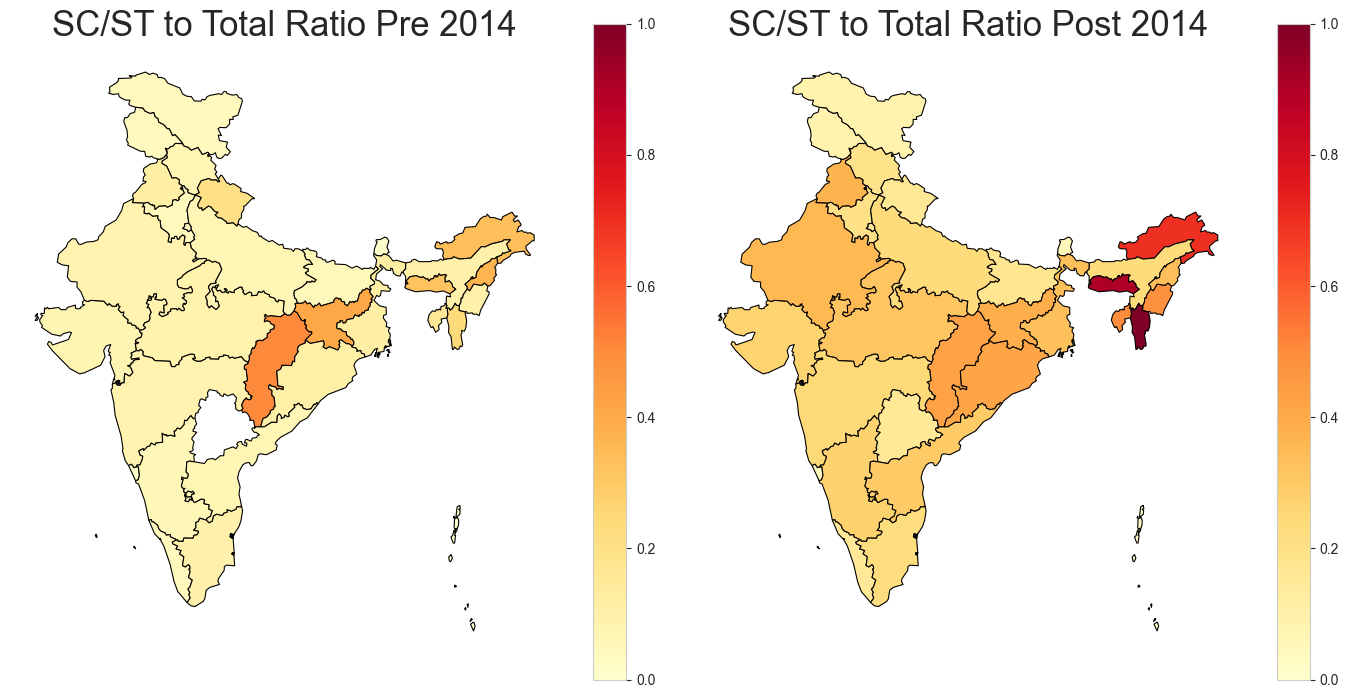

In [295]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have already defined 'map_df', 'df', and 'df_new'

# Function to create chloropleth map
def create_choropleth(ax, title, merged_df, vmin, vmax):
    ax.axis('off')
    ax.set_title(title, fontdict={'fontsize': '25', 'fontweight': '10'})
    merged_df.plot(column='SCST_to_Total_Ratio', cmap='YlOrRd', linewidth=0.8, ax=ax, edgecolor='0', legend=True, vmin=vmin, vmax=vmax)

# Create caste_ratio_df for df
caste_counts = df.groupby(['State', 'Candidate_Type'])['Candidate_Type'].count().unstack(fill_value=0)
caste_counts['SCST_to_Total_Ratio'] = (caste_counts["SC"] + caste_counts["ST"]) / (caste_counts["SC"] + caste_counts["ST"] + caste_counts["GENERAL"])
caste_counts['SCST_to_Total_Ratio'] = caste_counts['SCST_to_Total_Ratio'].replace([np.inf, -np.inf], 0)
caste_ratio_df = caste_counts[['SCST_to_Total_Ratio']].reset_index()
jammu_kashmir_ratio = caste_ratio_df.loc[caste_ratio_df['State'] == 'Jammu and Kashmir', 'SCST_to_Total_Ratio'].values[0]
new_row = {'State': 'Ladakh', 'SCST_to_Total_Ratio': jammu_kashmir_ratio}
caste_ratio_df = caste_ratio_df.append(new_row, ignore_index=True)
merged = map_df.set_index('st_nm').join(caste_ratio_df.set_index('State'))

# Create caste_ratio_df for df_new
caste_counts_new = df_new.groupby(['State', 'Candidate_Type'])['Candidate_Type'].count().unstack(fill_value=0)
caste_counts_new['SCST_to_Total_Ratio'] = (caste_counts_new["SC"] + caste_counts_new["ST"]) / (caste_counts_new["SC"] + caste_counts_new["ST"] + caste_counts_new["GENERAL"])
caste_counts_new['SCST_to_Total_Ratio'] = caste_counts_new['SCST_to_Total_Ratio'].replace([np.inf, -np.inf], 0)
caste_ratio_df_new = caste_counts_new[['SCST_to_Total_Ratio']].reset_index()
jammu_kashmir_ratio_new = caste_ratio_df_new.loc[caste_ratio_df_new['State'] == 'Jammu and Kashmir', 'SCST_to_Total_Ratio'].values[0]
new_row_new = {'State': 'Ladakh', 'SCST_to_Total_Ratio': jammu_kashmir_ratio_new}
caste_ratio_df_new = caste_ratio_df_new.append(new_row_new, ignore_index=True)
merged_new = map_df.set_index('st_nm').join(caste_ratio_df_new.set_index('State'))

# Determine the overall vmin and vmax for both DataFrames
overall_min = min(merged['SCST_to_Total_Ratio'].min(), merged_new['SCST_to_Total_Ratio'].min())
overall_max = max(merged['SCST_to_Total_Ratio'].max(), merged_new['SCST_to_Total_Ratio'].max())

# Create subplots for the two maps
fig, axes = plt.subplots(1, 2, figsize=(14, 7))

# Create chloropleth maps for df and df_new with the same gradient
create_choropleth(axes[0], 'SC/ST to Total Ratio Pre 2014', merged, vmin=overall_min, vmax=overall_max)
create_choropleth(axes[1], 'SC/ST to Total Ratio Post 2014', merged_new, vmin=overall_min, vmax=overall_max)

# Show the plots
plt.tight_layout()
plt.show()


In [253]:
df_new

,Unnamed: 0,State_Name,Assembly_No,Constituency_No,Year,Poll_No,DelimID,Position,Sex,Party,...,Last_Constituency_Name,Same_Constituency,Same_Party,No_Terms,Turncoat,Incumbent,Recontest,MyNeta_education,TCPD_Prof_Main,State


In [228]:
margin_df = df.groupby('State')['Margin_Percentage'].mean().reset_index()
margin_df = margin_df.rename(columns={'Margin_Percentage': 'Average_Margin'})

add ladakh

In [229]:
new_row = {
    'State': 'Ladakh',
    'Average_Margin': margin_df.loc[margin_df['State'] == 'Jammu and Kashmir', 'Average_Margin'].iloc[0]
}

# Append the new row to the DataFrame
margin_df = margin_df.append(new_row, ignore_index=True)
min_val = margin_df['Average_Margin'].min()
max_val = margin_df['Average_Margin'].max()
# Perform Min-Max scaling for the column
margin_df['Average_Margin'] = (margin_df['Average_Margin'] - min_val) / (max_val - min_val)

/var/folders/n0/ghrwq2494rq706swf_jqkwd80000gn/T/ipykernel_85602/1078684714.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  margin_df = margin_df.append(new_row, ignore_index=True)


In [230]:
merged = map_df.set_index('st_nm').join(margin_df.set_index('State'))

<Axes: title={'center': 'Deaths'}>

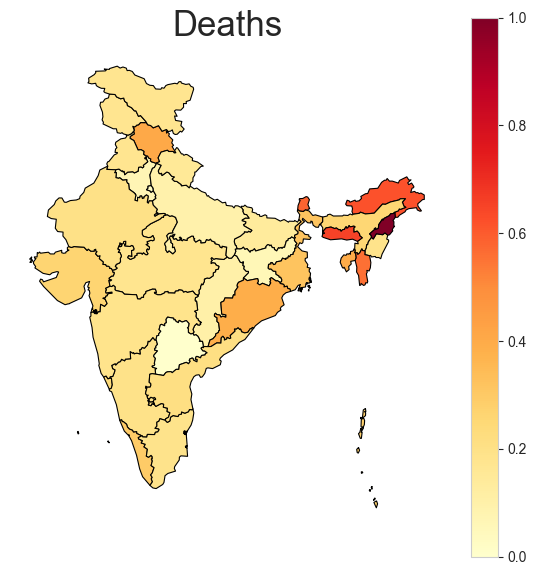

In [231]:
# create figure and axes for Matplotlib and set the title
fig, ax = plt.subplots(1, figsize=(7, 7))
ax.axis('off')
ax.set_title('Deaths', fontdict={'fontsize': '25', 'fontweight' : '10'})

# plot the figure
merged.plot(column='Average_Margin',cmap='YlOrRd', linewidth=0.8, ax=ax, edgecolor='0', legend=True,markersize=[39.739192, -104.990337])

## Plot 1: Gender Representation, and SC/ST representation


/var/folders/n0/ghrwq2494rq706swf_jqkwd80000gn/T/ipykernel_85602/1689228595.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gender_ratio_df = gender_ratio_df.append(new_row, ignore_index=True)


<Axes: title={'center': 'Deaths'}>

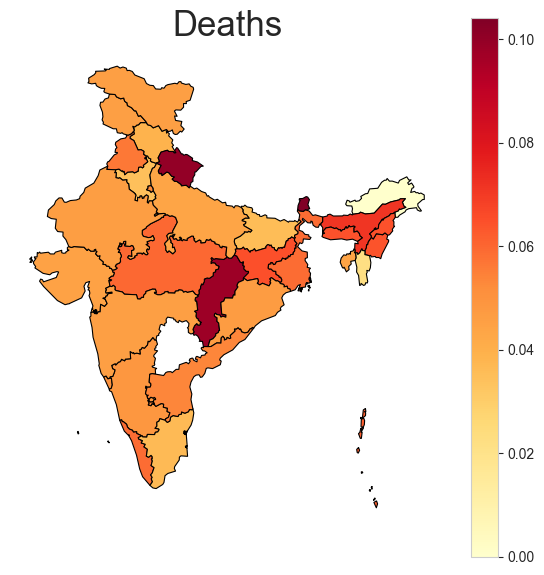

In [233]:
caste_counts = df.groupby(['State', 'Candidate_Type'])['Candidate_Type'].count().unstack(fill_value=0)
caste_counts['SCST_Ratio'] = (caste_counts["SC"] + caste_counts["ST"]) / caste_counts["GENERAL"] 
caste_counts['SCST_Ratio'] = np.where(np.isinf(caste_counts['SCST_Ratio']), 0, caste_counts['SCST_Ratio'])
caste_df = caste_counts[['SCST_Ratio']].reset_index()
jammu_kashmir_ratio = caste_df.loc[caste_df['State'] == 'Jammu and Kashmir', 'SCST_Ratio'].values[0]
new_row = {'State': 'Ladakh', 'SCST_Ratio': jammu_kashmir_ratio}
caste_df = caste_df.append(new_row, ignore_index=True)



/var/folders/n0/ghrwq2494rq706swf_jqkwd80000gn/T/ipykernel_85602/1410382258.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  caste_df = caste_df.append(new_row, ignore_index=True)


<Axes: title={'center': 'Deaths'}>

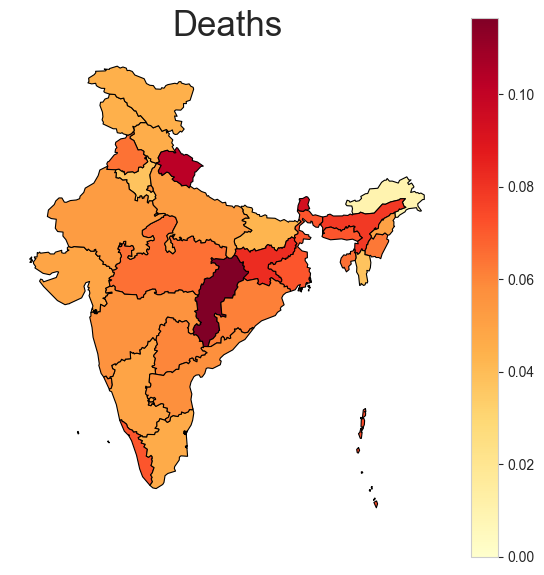

<Axes: title={'center': 'Deaths'}>

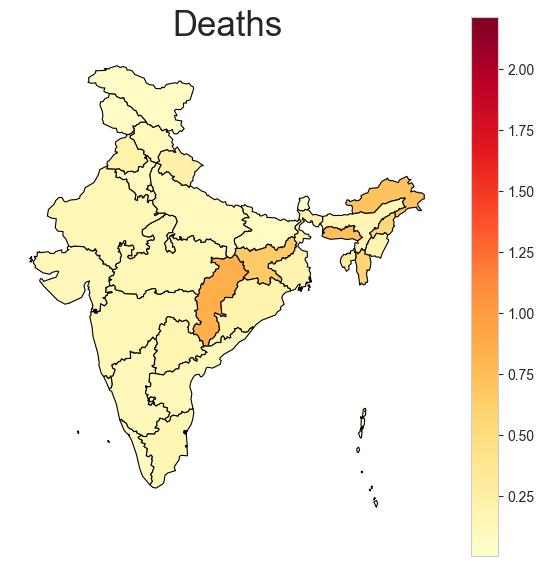

In [235]:
merged = map_df.set_index('st_nm').join(caste_df.set_index('State'))
fig, ax = plt.subplots(1, figsize=(7, 7))
ax.axis('off')
ax.set_title('Deaths', fontdict={'fontsize': '25', 'fontweight' : '10'})
merged.plot(column='SCST_Ratio',cmap='YlOrRd', linewidth=0.8, ax=ax, edgecolor='0', legend=True,markersize=[39.739192, -104.990337])